# UnionFind

- https://at274.hatenablog.com/entry/2018/02/02/173000
- https://www.youtube.com/watch?v=TdR816rqc3s&feature=youtu.be&t=6822


- 以下、自分の言葉で説明(間違ってるかも)


### ルール

- n個(後から増やすことは可能だが、減らすことはできない)の要素があり、これらはいずれかのグループに属する。最初は1要素1グループで形成されているとする
- できる操作は、
    - Find: `ある要素がどの集合に属しているかを調べる(集合の親のindex番号(後述)が返される)`
    - Union: `ある要素が所属する集団ともう一個の要素が所属する集団を合併させる`

### 内部構造
- n個のセルからなる配列を用意する。
- ある集団の親に関しては、相当する配列のセルに-(彼が率いる集団に所属する要素の個数)を収納する。
- ある集団の子に関しては、相当する配列のセルに(彼が所属する集団の上司に相当する配列のindex)を収納する。
- つまり最初は`[-1, -1, -1, ...]`を用意する

- unionに関しては、要素1が所属する集団の要素の個数と、要素2が所属する集団の要素の個数を比較して、大きい方の親が合併した集団の親となる
    - 親を勝ち取った方の要素に相当する配列のセルには、-(二集団の大きさの合計値)を再代入する
    - 親に慣れなかった方の元親の要素に相当する配列のセルには、親を勝ち取った要素に対応する配列のセルのindexを代入する。(=>負け集団の子分たちに関しては、もはやその集団の親に相当する配列のセルのindexを指し示しているのではなく、上司を指し示しているだけになる。ただしfindの際にメモ化によって、この子分たちの指し示す先を上司から親に書き換えていくことは行っている。)
    
- これによって、findに関しては、あるセルから初めて、その上司のセルを順々に辿ることで、所属する集団の親(top)のindexを得ることができる。

https://en.wikipedia.org/wiki/Disjoint-set_data_structure

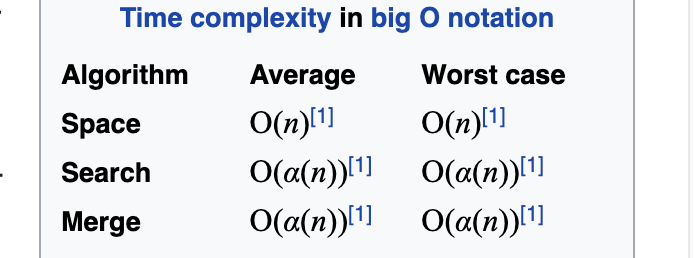

In [51]:
class UnionFind:
    def __init__(self, size):
        self.parent_indexes = [-1] * size
        
    def find(self, n):
        if self.parent_indexes[n] < 0:
            return n
        # 探しているnodeが指し示しているのが現在の親ではない場合、
        # 現在の親に書き換え(メモ化) した上で返す
        # path compression
        self.parent_indexes[n] = self.find(self.parent_indexes[n])
        return self.parent_indexes[n] 
    
    def union(self, n1, n2):
        if self.same_group(n1, n2):
            return False
        
        # union by rank
        # サイズの大きい方の集団の親が親であり続ける
        if self.size(n1) >= self.size(n2):
            tmp = self.size(n2)
            self.parent_indexes[self.find(n2)] = self.find(n1)
            self.parent_indexes[self.find(n1)] -= tmp
            return True
        
        # サイズが小さい方の集団の親は親を引退する
        tmp = self.size(n1)
        self.parent_indexes[self.find(n1)] = self.find(n2)
        self.parent_indexes[self.find(n2)] -= tmp
        return True
        
    # その要素が所属する集団の要素数
    def size(self, n):
        return -self.parent_indexes[self.find(n)]
    
    def same_group(self, n1, n2):
        return self.find(n1) == self.find(n2)

In [52]:
uf = UnionFind(4)

print(uf.union(0,1))
print(uf.parent_indexes)

True
[-2, 0, -1, -1]


In [53]:
print(uf.union(2,3))
print(uf.parent_indexes)
# 0<=1, 2<=3の状態で0と2をunionする
print(uf.union(0,2))
print(uf.parent_indexes)
# 0<=1, 0<=2<=3になった。

True
[-2, 0, -2, 2]
True
[-4, 0, 0, 2]


In [ ]:
# UnionFindクラスのテスト
uf = UnionFind(5)
uf.union(0,1)
uf.union(2,3)
assert uf.parent_indexes == [-2, 0, -2, 2, -1]
uf.union(0,2)
assert uf.parent_indexes == [-4, 0, 0, 2, -1]
uf.find(3)
assert uf.parent_indexes == [-4, 0, 0, 0, -1]
assert uf.are_in_the_same_group(0,1)
assert ~uf.are_in_the_same_group(0,4)
for i in range(4):
    assert uf.get_group_size(i) == 4
    assert uf.find(i) == 0
assert uf.get_group_size(4) == 1

## Warning! メモ化をしても常に、nodeの指し示す場所が最新の親とは限らない

(昔の親かもしれない)

## simple version

- チーム内の要素数が不要の場合 (つまりunion by rank最適化されてない)
- チーム数が不要の場合
- unionとare_unified?だけ欲しい

とき、以下で良い。

https://leetcode.com/problems/most-stones-removed-with-same-row-or-column/discuss/1783599/Python3-or-DSU を参考にした。

In [4]:
class UnionFind:
    def __init__(self,N):
        self.parent=list(range(N))
    def union(self,x,y):
        self.parent[self.findPar(x)]=self.findPar(y)
    def are_unified(self,x,y):
        return self.findPar(x) == self.findPar(y)

    def findPar(self,x):
        if self.parent[x]!=x:
            self.parent[x]=self.findPar(self.parent[x])
        return self.parent[x]